1.梯度下降算法定义感知机

In [16]:
import numpy as np
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        # 第一层循环是迭代次数，第二层是随机梯度下降
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                # update 代表如何去改变参数
                update = self.eta * (target - self.predict(xi))
                # 下面的两项对应公式中，w1 和 w0（就是截距 b） 如何 改变自己得到一个更加正确的参数
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors) 
        return self
    # 函数 fit 是一个训练的过程，构建机器学习算法还 需要预测，也就是 wx+b 然后和阈值进行对比，得到一个数值
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X):
        # 和阈值做比较，得到一个 1 或者 -1 的结果
        return np.where(self.net_input(X) >= 0.0, 1, -1)

2.导入数据集：

In [17]:
import pandas as pd
df = pd.read_csv('data/iris.data', header=None)

3.将数据集用散点分割

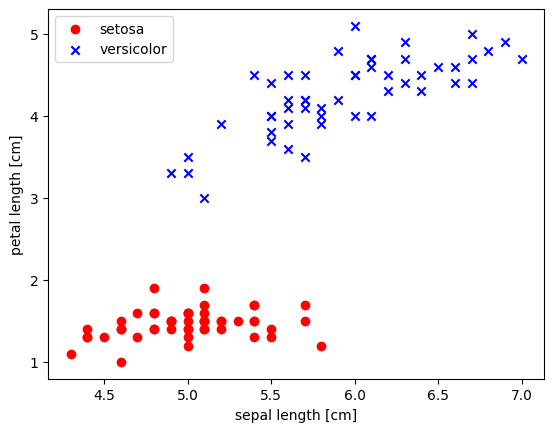

In [18]:
import matplotlib.pyplot as plt
import numpy as np
 
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
 
#确定作图大小
X = df.iloc[0:100, [0, 2]].values
 
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')
 
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

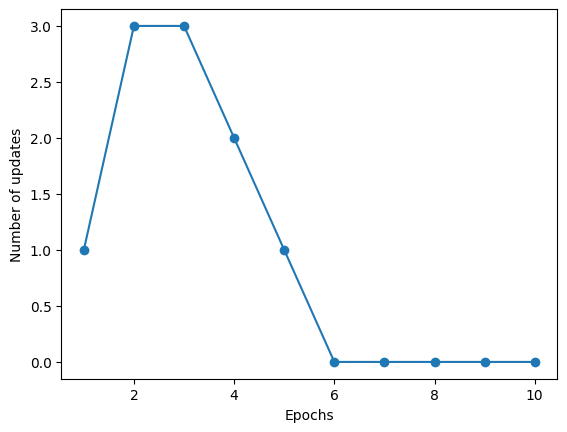

In [19]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [20]:
X.shape[1]

2

5，打印结果

C:\Users\HERISK\AppData\Local\Temp\ipykernel_17236\2521441517.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


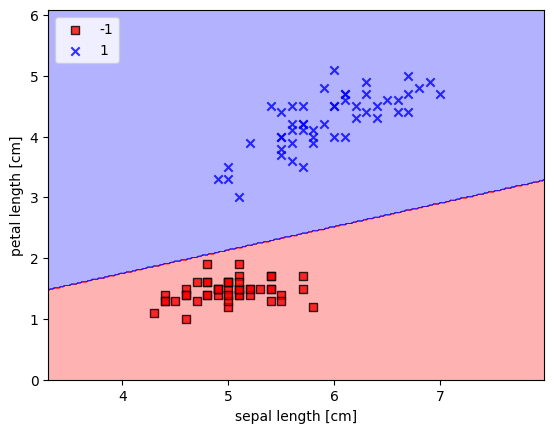

In [21]:
from matplotlib.colors import ListedColormap
 
def plot_decision_regions(X, y, classifier, resolution=0.02):
 
    # 修改显色
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
 
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

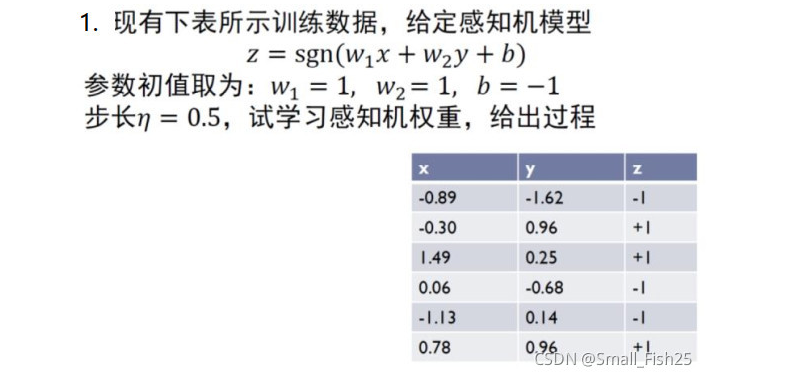

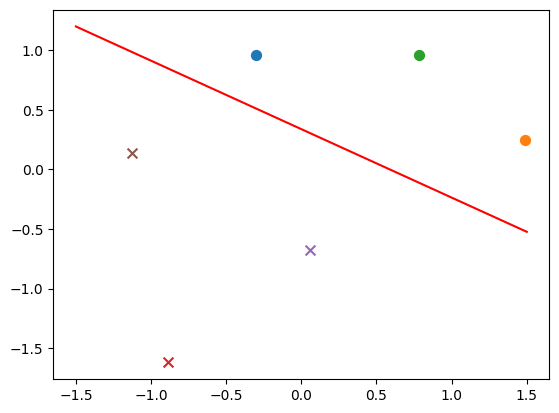

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import random

# 符号函数
def sign(v):
    if v >= 0:
        return 1
    else:
        return -1

def train(train_num, train_data, lr=0.5):  # 原始训练部分
    w = [1., 1.]  # 初始化权重向量和偏置
    b = -1
    for i in range(train_num):
        #x = random.choice(train_data)
        for x in train_data:
            x1, x2, y = x
            if y * sign(x1 * w[0] + x2 * w[1] + b) <= 0:
                w[0] += lr * y * x1
                w[1] += lr * y * x2
                b += lr * y
                #print(w,b)
    return w, b

# 画散点图
def plot_points(train_data, w, b):
    plt.figure()
    x1 = np.linspace(-1.5, 1.5, 100)
    x2 = (-b - w[0] * x1) / w[1]  # 化简 w1*x1 + w2*x2 + b =0 此时x2相当于竖轴坐标
    plt.plot(x1, x2, color='r', label='y1 data')
    datas_len = len(train_data)
    for i in range(datas_len):
        if train_data[i][-1] == 1:
            plt.scatter(train_data[i][0], train_data[i][1], s=50)
        else:
            plt.scatter(train_data[i][0], train_data[i][1], marker='x', s=50)
    plt.show()

if __name__ == '__main__':
    train_data1 = [[-0.30,0.96,1],[1.49,0.25,1],[0.78,0.96,1]]  # 正样本
    train_data2 = [[-0.89,-1.62,-1], [0.06,-0.68,-1],[-1.13,0.14,-1]]  # 负样本
    data_set = train_data1 + train_data2  # 样本集
    w, b = train(100, data_set, 0.5)  # lr 学习率
    plot_points(data_set, w, b)


[1. 1. 1. 1. 1. 1.]
[-1. -1. -1. -1. -1. -1.]
[1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1.]
[-1. -1.  1. -1. -1. -1.]
[1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1.]
[-1. -1. -1. -1. -1. -1.]
[1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1.]
[-1. -1.  1. -1. -1. -1.]
[1. 1. 1. 1. 1. 1.]
[ 1.  1.  1. -1. -1.  1.]
[-1. -1.  1. -1. -1. -1.]
[1. 1. 1. 1. 1. 1.]
[ 1.  1.  1. -1. -1.  1.]
[-1. -1.  1. -1. -1. -1.]
[1. 1. 1. 1. 1. 1.]
[ 1.  1.  1. -1. -1.  1.]
[-1. -1.  1. -1. -1. -1.]
[1. 1. 1. 1. 1. 1.]
[ 1.  1.  1. -1. -1.  1.]
[-1. -1.  1. -1. -1. -1.]
[1. 1. 1. 1. 1. 1.]
[ 1.  1.  1. -1. -1.  1.]
[-1. -1.  1. -1. -1. -1.]
[1. 1. 1. 1. 1. 1.]
[ 1.  1.  1. -1. -1.  1.]
[-1.  1.  1. -1. -1. -1.]
[ 1.  1.  1. -1. -1.  1.]
[ 1.  1.  1. -1. -1. -1.]


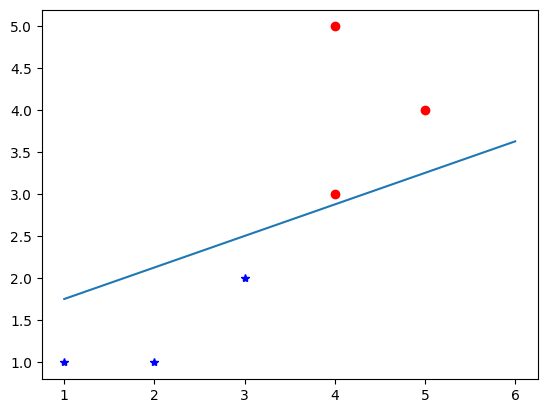

In [28]:
## 感知机模型实例
import numpy as np
import matplotlib.pyplot as plt

def perceptron(X,Y,weight,train_nums,lr):
    # 在训练次数内,进行以下迭代
    for nums in range(train_nums):
        # 计算当前权重下的线性加权结果
        current_outcome = X.dot(weight)
        # 将当前线性加权结果进行sigmod
        current_outcome = np.sign(current_outcome)
        # 根据实际输出与期望输出的差值调整权重
        delatW = lr*(Y-current_outcome.T).dot(X)
        # 调整权重
        weight = weight+delatW
        print(current_outcome)
        # 判断训练输出结果和期望输出结果是否相同
        if (Y == current_outcome).all():
               break
    return weight

if __name__ == "__main__":
    # 设置训练集
    X = np.array([[1,4,3],[1,5,4],[1,4,5],[1,1,1],[1,2,1],[1,3,2]])
    Y = np.array([1,1,1,-1,-1,-1])
    # 设置训练次数和学习率,初始权重([-1,1])
    train_nums = 100
    lr = 0.1
    np.random.seed(4)
    weight = 2*(np.random.random(3)-0.5)
    # 开始训练
    W = perceptron(X,Y,weight,train_nums,lr)
    # 输出分界线并绘图
    x1 = np.array([1,6])
    x2 = (-W[1]/W[2])*x1-W[0]/W[2]
    plt.plot(x1,x2)
    plt.plot(X[:,1][0:3],X[:,2][0:3],'ro')
    plt.plot(X[:,1][3:6],X[:,2][3:6],'b*')
    plt.show()
    


原始形式

分离超平面的法向量w=[1 1],截距b=-3


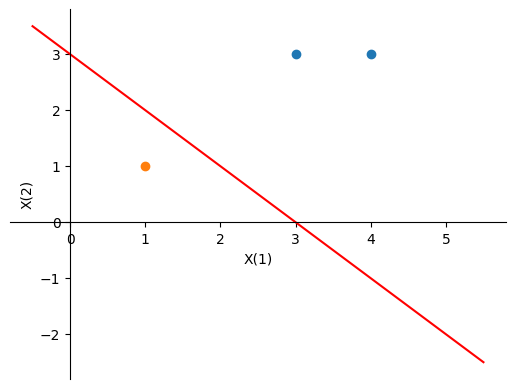

In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
 
    
df=pd.read_excel(r"E:\python_learn\ML\such\1.Perceptron\perceptron-algorithm-main\perceptrondata.xls");#读取原题数据
df=pd.DataFrame(df);
x=df.values[:,:-1];#x代表所有行的第一列到倒数第二列的数据，即分类实例的所有特征向量
y=df.values[:,-1];#y代表df的倒数第一列数据，即分类实例的所有类别
a=x.shape;
n=a[0];#n代表x特征向量的行数
m=a[1];#m代表x特征向量的列数
w=[];#创建空列表，w代表分离超平面中的法向量
for i in range(m):
    w.append(0);#列表的长度与特征向量的特征个数相同
#若直接命令w[0]=0,w[1]=0时，会报错，直接按照索引向列表内添加东西时，因为空的列表不能直接指定其位置。
b=0;#b代表分离超平面的截距
k=1;#用来判别是否找到最优的超平面。假设值为1，即未找到
while (k==1):
    k=0;
    for i in range(n):
        t=np.dot(w,x[i]);#用来计算w*x
        if (y[i]*(t+b)<=0):
            w=w+np.dot(y[i],x[i]);
            b=b+y[i];
            k=1;
print("分离超平面的法向量w={0},截距b={1}".format(w,b));
########可视化结果

def plot_and_scatter(df=None,w=0,b=0):
    xmin=df.values[:,:-1].min();
    xmax=df.values[:,:-1].max();
    xdiff=(xmax-xmin)*0.5;
    xx=np.linspace((xmin-xdiff),(xmax+xdiff),100);
    yy=-b-w[1]*xx;
    plt.figure();
    plt.xlabel("X(1)");
    plt.ylabel("X(2)");#设置坐标轴的文字标签
    ax=plt.gca();# get current axis 获得坐标轴对象
    ax.spines["right"].set_color("none");
    ax.spines["top"].set_color("none"); # 将右边 上边的两条边颜色设置为空 其实就相当于抹掉这两条边
    ax.xaxis.set_ticks_position("bottom");
    ax.yaxis.set_ticks_position("left");
    ax.spines["bottom"].set_position(("data",0));
    ax.spines["left"].set_position(("data",0));#指定 data设置的bottom(也就是指定的x轴)绑定到y轴的0这个点上
    plt.plot(xx,yy,"r");
    color_list=["blue","green","black","pink","orange"];
    y=df.values[:,-1];

    a=set(y);
    a=list(a);
    y_num=len(a);
    t=0;
    for j in range(y_num):
        tt=a[j];
        y_index=[i for i,y in enumerate(y) if y==tt];
        x_group1=df.values[y_index,0];
        x_group2=df.values[y_index,1];
        plt.scatter(x_group1,x_group2);
        t=t+1;

plot_and_scatter(df,w,b);
plt.show();

对偶问题

分离超平面的法向量w= [1, 1] ,截距b= -3


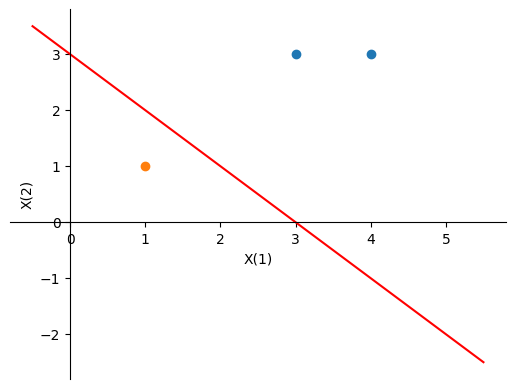

In [6]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
df=pd.read_excel(r"E:\python_learn\ML\such\1.Perceptron\perceptron-algorithm-main\perceptrondata.xls");#读取原题数据
df=pd.DataFrame(df);
x=df.values[:,:-1];#切片，分割特征向量x和对应的类别y
y=df.values[:,-1];
xy=x.shape;#输出x的行数和列数
n=xy[0];#代表特征向量x的行数
m=xy[1];#代表特征向量x的列数
a=[];
b=0;
for i in range(n):
    a.append(0);
g=np.zeros((n,n));
for i in range(n):
    for j in range(n):
        for l in range(m):
            g[i][j]=g[i][j]+x[i][l]*x[j][l];#计算Gram矩阵
k=1;
while (k==1):#当样本中存在误分点时
    k=0;#本次循环中样本假设不存在误分点
    for i in range(n):
        t=0;
        for j in range(n):
            t=t+g[i][j]*y[j]*a[j];
        if (y[i]*(t+b)<=0):
            a[i]=a[i]+1;#计算a[i]的值
            b=b+y[i];#计算b的值
            k=1;#样本中存在误分点
w=[];
for j in range(m):
    w.append(0);
for j in range(m):
    for i in range(n):
        w[j]=w[j]+a[i]*x[i][j]*y[i];
print("分离超平面的法向量w=",w,",截距b=",b)


def plot_and_scatter(df=None,w=0,b=0):
    xmin=df.values[:,:-1].min();
    xmax=df.values[:,:-1].max();
    xdiff=(xmax-xmin)*0.5;
    xx=np.linspace((xmin-xdiff),(xmax+xdiff),100);
    yy=(-b-w[0]*xx)/w[1];
    plt.figure();
    plt.xlabel("X(1)");
    plt.ylabel("X(2)");#设置坐标轴的文字标签
    ax=plt.gca();# get current axis 获得坐标轴对象
    ax.spines["right"].set_color("none");
    ax.spines["top"].set_color("none"); # 将右边 上边的两条边颜色设置为空 其实就相当于抹掉这两条边
    ax.xaxis.set_ticks_position("bottom");
    ax.yaxis.set_ticks_position("left");
    ax.spines["bottom"].set_position(("data",0));
    ax.spines["left"].set_position(("data",0));#指定 data设置的bottom(也就是指定的x轴)绑定到y轴的0这个点上
    plt.plot(xx,yy,"r");
    color_list=["blue","green","black","pink","orange"];
    y=df.values[:,-1];

    a=set(y);
    a=list(a);
    y_num=len(a);
    t=0;
    for j in range(y_num):
        tt=a[j];
        y_index=[i for i,y in enumerate(y) if y==tt];
        x_group1=df.values[y_index,0];
        x_group2=df.values[y_index,1];
        plt.scatter(x_group1,x_group2);
        t=t+1;
 
plot_and_scatter(df,w,b);
plt.show();